# 1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame
## (Don’t use any special options). Display the first few rows and the DataFrame info.
## You should have seen that the dates were not automatically parsed into datetime types.

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [33]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
df = pd.read_csv(url)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


# 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index
## Verify that this worked using the head and info functions.

In [35]:
df = pd.read_csv(url, parse_dates=['time', 'updated'], index_col='id')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

# 3) Use describe to get the basic statistics of all the columns
## Note the highest and lowest magnitude of earthquakes in the databse.

In [37]:
df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [38]:
lowest_mag = df.mag.min()
highest_mag =df.mag.max()
print('Lowest magnitude of earthquakes is', lowest_mag)
print('Highest magnitude of earthquakes is', highest_mag)

Lowest magnitude of earthquakes is -0.97
Highest magnitude of earthquakes is 8.2


# 4) Use nlargest to get the top 20 earthquakes by magnitude
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html
## Examine the structure of the place column. The state / country information seems to be in there. How would you get it out?

In [39]:
top20 = df.nlargest(n=20,columns='mag')
top20

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30 16:24:51.223000+00:00,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18 21:54:08.699000+00:00,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06 07:31:05.755000+00:00,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18 21:54:27.398000+00:00,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18 21:54:18.633000+00:00,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13 19:29:13.018000+00:00,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13 19:35:02.679000+00:00,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13 19:30:39.599000+00:00,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01 02:37:56+00:00,"56km WSW of Panguna, Papua New Guinea",earthquake


In [40]:
def extract_location(place):
    parts = place.split(',')
    parts = [part.strip() for part in parts if part.strip()]
    if len(parts) > 1:
        return parts[-1]
    else:
        if 'of' in place:
            parts_after_of = place.split('of', 1)[1].strip()
            parts = parts_after_of.split(',')
            location = parts[0].strip()
            return location
        else:
            return place.strip()
top20_countries = top20['place'].apply(extract_location)
print(top20_countries)

id
usc000nzvd                         Chile
usc000rki5                        Alaska
usc000p27i                         Chile
usc000phx5               Solomon Islands
usb000pr89              Papua New Guinea
usc000piqj               Solomon Islands
usb000slwn                   El Salvador
usb000pq41                        Mexico
usc000pft9              Papua New Guinea
usc000sxh8                     Indonesia
usc000stdc                          Fiji
usb000sk6k    Southern East Pacific Rise
usc000mnvj                         China
usc000nzwm                         Chile
usb000r2hc                        Greece
usc000rngj                Visokoi Island
usc000rkg5                   New Zealand
usb000ruzk                          Fiji
usc000rr6a                        Mexico
usb000rzki             Micronesia region
Name: place, dtype: object


# 5) Extract the state or country using Pandas text data functions
## Add it as a new column to the dataframe called country. Note that some of the “countries” are actually U.S. states.

In [42]:
df['country'] = df['place'].apply(extract_location)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,2015-03-24 18:25:07.628000+00:00,"29km SW of Valdez, Alaska",earthquake,Alaska
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,2014-12-10 01:04:25.209000+00:00,"102km SSE of Old Iliamna, Alaska",earthquake,Alaska
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,2014-12-01 01:15:02.814000+00:00,"9km WNW of Cobb, California",earthquake,California


# 6) Display each unique value from the new column

In [43]:
unique_countries = df['country'].unique()
unique_countries

array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', 'the Fiji Islands', 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Wyoming', 'Antarctica', 'Chile', 'Utah', 'Indonesia',
       'Solomon Islands', 'Micronesia', 'Oklahoma', 'Hawaii', 'Russia',
       'Arizona', 'Philippines', 'Bolivia', 'Greece', 'Japan',
       'Puerto Rico', 'Iran', 'Tonga', 'Wallis and Futuna', 'Colorado',
       'Guam', 'CA', 'Carlsberg Ridge', 'Idaho', 'Pakistan',
       'northern Sumatra', 'Burma', 'China', 'Peru',
       'the North Island of New Zealand', 'Costa Rica', 'Reykjanes Ridge',
       'East Timor', 'Central East Pacific Rise', 'Mid-Indian Ridge',
       'Japan region', 'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Northern Mid-Atlantic Ridge', 'Taiwan', 'Arkansas',
       'South Sandwich Islands', 'Colombia', 'Dominican Republic',
       'Argentina', 'Texas', 'New Hampshire', 'Saint Helena

# 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [47]:
filtered_df = df.loc[df.mag>=4]
filtered_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08 01:43:19+00:00,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08 01:43:19+00:00,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08 01:43:19+00:00,South of the Fiji Islands,earthquake,the Fiji Islands
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08 01:43:19+00:00,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08 01:43:19+00:00,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24 00:35:14.040000+00:00,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24 00:35:14.040000+00:00,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24 00:35:14.040000+00:00,"37km ESE of Santiago, Philippines",earthquake,Philippines


# 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

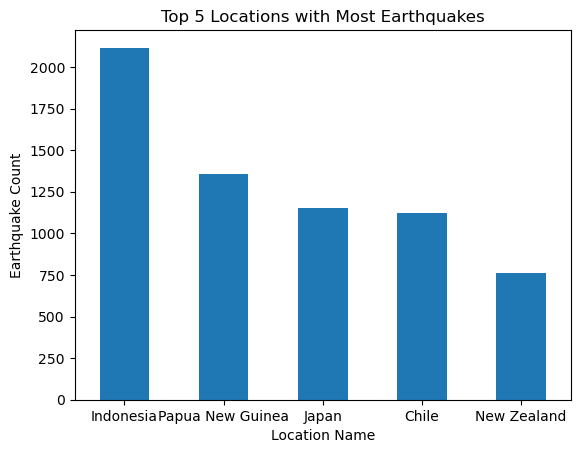

In [48]:
top_5_locations = filtered_df['country'].value_counts().head(5)
top_5_locations.plot(kind='bar')
plt.title('Top 5 Locations with Most Earthquakes')
plt.xlabel('Location Name')
plt.ylabel('Earthquake Count')
plt.xticks(rotation=0)
plt.show()

# 9) Make a histogram the distribution of the Earthquake magnitudes
Do one subplot for the filtered and one for the unfiltered dataset. Use a Logarithmic scale. What sort of relationship do you see?

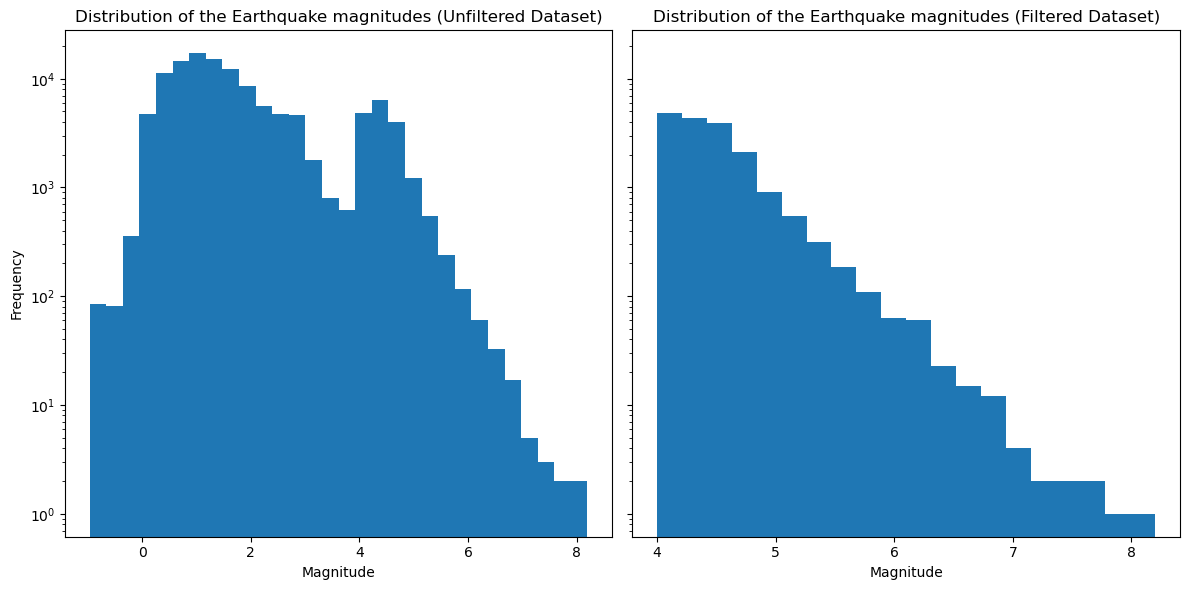

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey = True)

ax[0].hist(df['mag'], bins=30, log=True)
ax[0].set_title('Distribution of the Earthquake magnitudes (Unfiltered Dataset)')
ax[0].set_xlabel('Magnitude')
ax[0].set_ylabel('Frequency')

ax[1].hist(filtered_df['mag'], bins=20, log=True)
ax[1].set_title('Distribution of the Earthquake magnitudes (Filtered Dataset)')
ax[1].set_xlabel('Magnitude')

plt.tight_layout()
plt.show()

In [51]:
print('Small magnitude earthquakes are more frequent. Frequency approximately decreases exponentially with magnitude increasing.')

Small magnitude earthquakes are more frequent. Frequency approximately decreases exponentially with magnitude increasing.


# 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude
Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

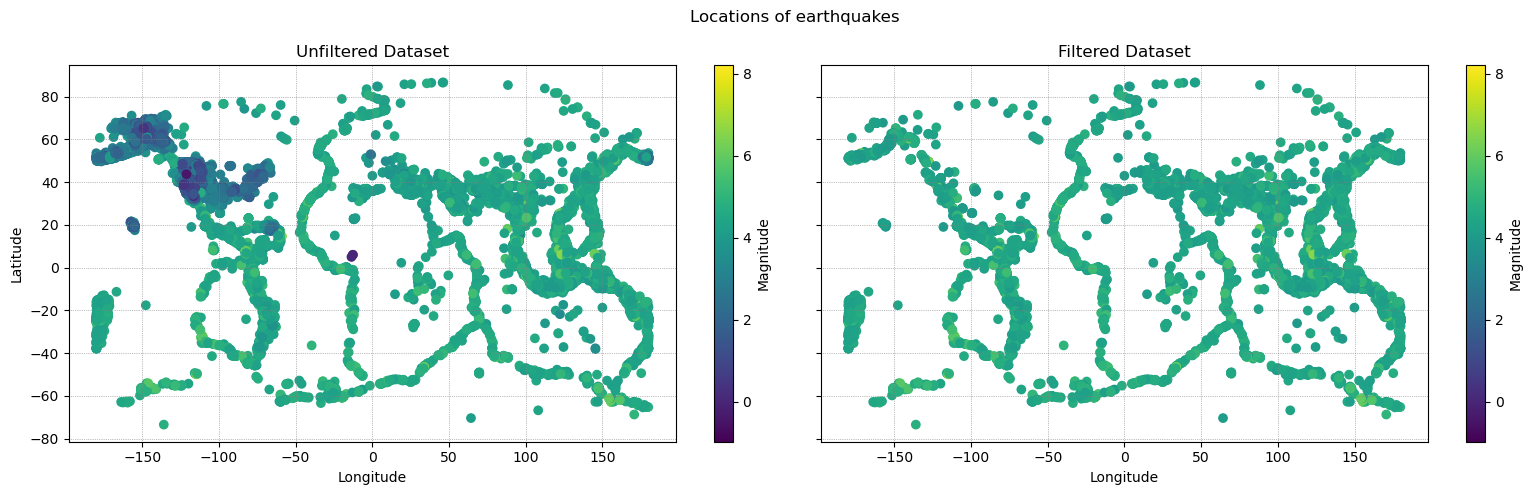

In [52]:
mag_min = df['mag'].min()
mag_max = df['mag'].max()

fig, ax = plt.subplots(1, 2, figsize=(16, 5), sharey = True)

sc1 = ax[0].scatter(df['longitude'], df['latitude'], c=df['mag'], vmin=mag_min, vmax=mag_max)
ax[0].set_title('Unfiltered Dataset')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].grid(color='gray', linestyle='dotted', linewidth=0.5)
cbar1 = fig.colorbar(sc1, ax=ax[0])
cbar1.set_label('Magnitude')

sc2 = ax[1].scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df['mag'], vmin=mag_min, vmax=mag_max)
ax[1].set_title('Filtered Dataset')
ax[1].set_xlabel('Longitude')
ax[1].grid(color='gray', linestyle='dotted', linewidth=0.5)
cbar2 = fig.colorbar(sc2, ax=ax[1])
cbar2.set_label('Magnitude')

plt.suptitle('Locations of earthquakes')
plt.tight_layout()
plt.show()

In [54]:
print('The points in the upper-left part of the unfiltered dataset plot are denser, which suggests a high frequency of low magnitude earthquakes in this area.')
print('The range of colors in the unfiltered plot is broader, reflecting the inclusion of a larger range of earthquake magnitudes.')

The points in the upper-left part of the unfiltered dataset plot are denser, which suggests a high frequency of low magnitude earthquakes in this area.
The range of colors in the unfiltered plot is broader, reflecting the inclusion of a larger range of earthquake magnitudes.
